In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet

from neuralforecast.losses.numpy import mae, mse

In [8]:
plt.rcParams["figure.figsize"] = (9,6)

## Read data 

In [15]:
df = pd.read_csv('data/etth1.csv')

df['ds'] = pd.to_datetime(df['ds'])

df.head()

,ds,unique_id,y
0,2016-07-01 00:00:00,OT,1.460552
1,2016-07-01 01:00:00,OT,1.161527
2,2016-07-01 02:00:00,OT,1.161527
3,2016-07-01 03:00:00,OT,0.862611
4,2016-07-01 04:00:00,OT,0.525227


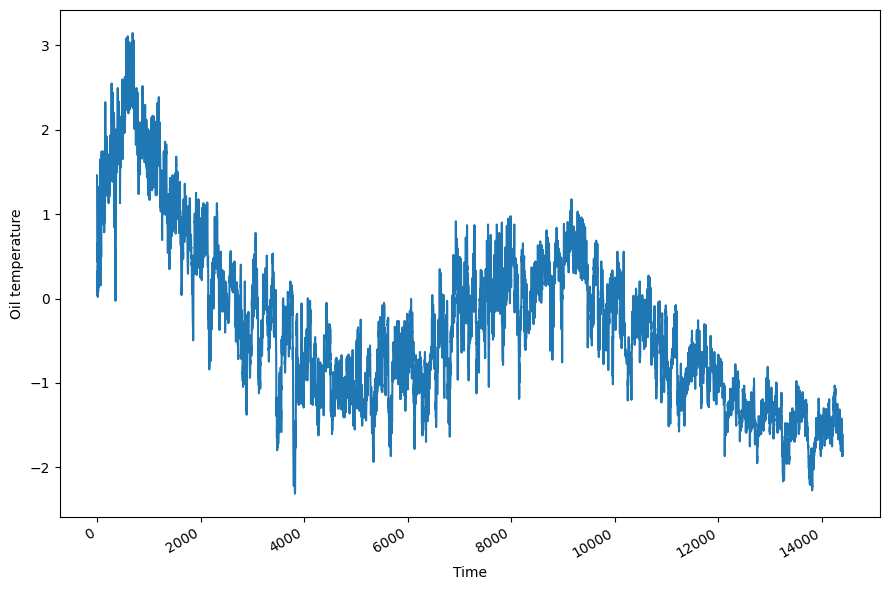

In [10]:
fig, ax = plt.subplots()

ax.plot(df['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

## Model 

In [29]:
horizon = 96

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         TimesNet(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [30]:
nf = NeuralForecast(models=models, freq='H')

In [31]:
preds_df = nf.cross_validation(df=df, step_size=horizon, n_windows=2)

Epoch 49: 100%|█████████████████| 1/1 [00:00<00:00,  8.26it/s, v_num=71, train_loss_step=0.251, train_loss_epoch=0.258]
Validation: 0it [00:00, ?it/s]
Epoch 49: 100%|█████████████████| 1/1 [00:00<00:00,  7.46it/s, v_num=73, train_loss_step=0.252, train_loss_epoch=0.259]
Validation: 0it [00:00, ?it/s]
Epoch 49: 100%|█████████████████| 1/1 [00:10<00:00, 10.90s/it, v_num=75, train_loss_step=1.090, train_loss_epoch=1.160]
Validation: 0it [00:00, ?it/s]
Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]


In [32]:
preds_df.head()

,unique_id,ds,cutoff,NHITS,NBEATS,TimesNet,y
0,OT,2018-02-13 00:00:00,2018-02-12 23:00:00,-1.410976,-1.411055,-1.511951,-1.398929
1,OT,2018-02-13 01:00:00,2018-02-12 23:00:00,-1.420605,-1.390586,-1.539502,-1.398929
2,OT,2018-02-13 02:00:00,2018-02-12 23:00:00,-1.432935,-1.436199,-1.516600,-1.421923
3,OT,2018-02-13 03:00:00,2018-02-12 23:00:00,-1.443960,-1.463686,-1.541980,-1.506269
4,OT,2018-02-13 04:00:00,2018-02-12 23:00:00,-1.461759,-1.468359,-1.508051,-1.452545


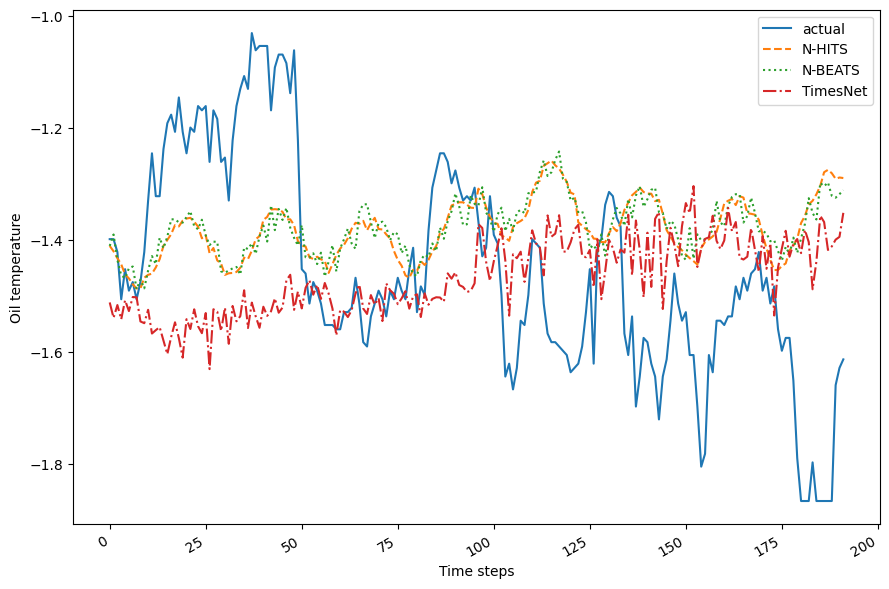

In [33]:
fig, ax = plt.subplots()

ax.plot(preds_df['y'], label='actual')
ax.plot(preds_df['NHITS'], label='N-HITS', ls='--')
ax.plot(preds_df['NBEATS'], label='N-BEATS', ls=':')
ax.plot(preds_df['TimesNet'], label='TimesNet', ls='-.')

ax.legend(loc='best')
ax.set_xlabel('Time steps')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

In [34]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,TimesNet
mae,0.180884,0.182920,0.187393
mse,0.049666,0.049415,0.056594
